In [12]:
'''
Let's apply all these principles to estimate housing prices.
Using "decision tree regressor with Adaptive Boosting" to solve this problem.
'''
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# housing dataset
housing_data = datasets.load_boston() # housing_data[data,target]
print("housing_data type = ",type(housing_data))
# separate dataset into trainging and testing
X,Y = shuffle(housing_data.data, housing_data.target, random_state=7)
num_training = int(0.8*len(X))
X_train, Y_train = X[:num_training],Y[:num_training]
X_test, Y_test = X[num_training:],Y[num_training:]


'''
compare fit results and see how AdaBoost really boosts the performance of decision tree regressor
'''
# fit a decision tree regression model
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train,Y_train)

# fit decision tree regression with AdaBoost
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(X_train,Y_train)

# evaluate the performance
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(Y_test,y_pred_dt)
evs = explained_variance_score(Y_test,y_pred_dt)
print("\n### Decision Tree performance ###")
print("\nMean squared error = ",round(mse,2))
print("\nExplained variance score = ",round(evs,2))

y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(Y_test,y_pred_ab)
evs = explained_variance_score(Y_test,y_pred_ab)
print("\n### Decision Tree performance ###")
print("\nMean squared error = ",round(mse,2))
print("\nExplained variance score = ",round(evs,2))

housing_data type =  <class 'sklearn.utils.Bunch'>

### Decision Tree performance ###

Mean squared error =  14.79

Explained variance score =  0.82

### Decision Tree performance ###

Mean squared error =  7.54

Explained variance score =  0.91


In [8]:
print(housing_data.data[0],housing_data.target[0])
print(dt_regressor.feature_importances_)
print(housing_data.feature_names)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 24.0
[0.03856422 0.         0.         0.         0.02908806 0.62202035
 0.00078264 0.10473383 0.         0.         0.00460542 0.
 0.20020548]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


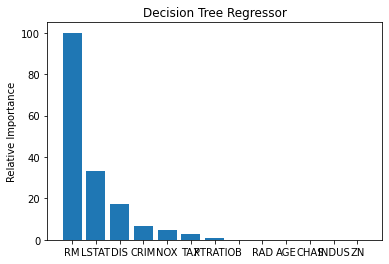

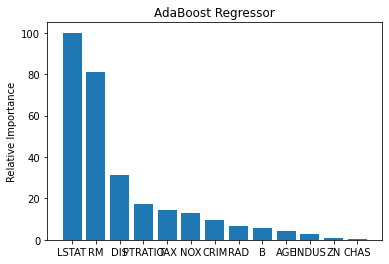

In [28]:
def plot_feature_importance(feature_importances,title,feature_names):
    # Normalize the importance values
    feature_importances = 100 * (feature_importances/max(feature_importances))
    
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))
    
    # Center the location of the labels on the X-axis
    pos = np.arange(index_sorted.shape[0])+0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

plot_feature_importance(dt_regressor.feature_importances_,'Decision Tree Regressor', housing_data.feature_names)
plot_feature_importance(ab_regressor.feature_importances_,'AdaBoost Regressor',housing_data.feature_names)


Random Forest Regressor Performance

Mean squared error =  359657.83

Explained variance score = 0.89


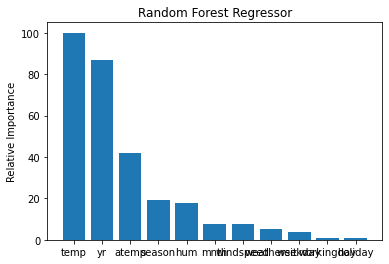

In [37]:
import csv
from sklearn.ensemble import RandomForestRegressor
#from estimating_house_prices import plot_feature_importances

def load_dataset(filename):
    file_reader = csv.reader(open(filename,'r'),delimiter=',')
    X,Y = [], []
    for row in file_reader:
        X.append(row[2:13])
        Y.append(row[-1])
        
    # Extract feature names
    feature_names = np.array(X[0])
        
    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(Y[1:]).astype(np.float32), feature_names

X, Y ,feature_names = load_dataset('day.csv')
X, Y = shuffle(X,Y,random_state=7)

num_training = int(0.9*len(X))
x_train, y_train = X[:num_training], Y[:num_training]
x_test, y_test = X[num_training:], Y[num_training:]

# 3. training "Random Forest Regressor" model
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=0.01)
rf_regressor.fit(x_train,y_train)

# 4. evaluate model performance
y_pred_rf = rf_regressor.predict(x_test)
mse = mean_squared_error(y_test,y_pred_rf)
evs = explained_variance_score(y_test,y_pred_rf)

print("\nRandom Forest Regressor Performance")
print("\nMean squared error = ",round(mse,2))
print("\nExplained variance score =",round(evs,2))

# 5. feature importance relative plot
plot_feature_importances(rf_regressor.feature_importances_,'Random Forest Regressor',feature_names)